In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Lecture 13: Numerical Methods for Partial Differential Equations

## Topics

* More on the stability of FDM for Black-Scholes
* Multi spatial variables: ADI method
* Numerical examples

    
    





# More on the stability of FDM for Black-Scholes:

* When $r \neq 0$:

\begin{aligned}
e^{a\triangle t} & = \left\{ \frac{1}{2}\sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} - r x_j \frac{\triangle t}{2\triangle x} \right\} e^{-il_m\triangle x}
\\
& + \left\{ 1 - \sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2}  -r \triangle t \right\}
\\
& + \left\{ \frac{1}{2}\sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} + r x_j \frac{\triangle t}{2\triangle x} \right\} e^{il_m\triangle x}
\end{aligned}






* which is

$$
e^{a\triangle t}  = 1 - r\triangle t + \sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} \cdot 2\sin^2(l_m\triangle x/2) + i\; r x_j \frac{\triangle t}{\triangle x} \sin(l_m\triangle x)
$$


* To satyisfiy $ |e^{a\triangle t}| < 1 $, we require

\begin{aligned}
\renewcommand{PDut}{\frac{\partial u}{\partial t}}
\renewcommand{PDux}{\frac{\partial u}{\partial x}}
\renewcommand{PDutt}{\frac{\partial ^2u}{\partial t^2}}
\renewcommand{PDuxx}{\frac{\partial ^2u}{\partial x^2}}
\renewcommand{FDut}{\frac{u_{i,k+1}-u_{i,k}}{\triangle t}}
\renewcommand{FDutb}{\frac{u_{i,k}-u_{i,k-1}}{\triangle t}}
\renewcommand{FDutc}{\frac{u_{i,k+1}-u_{i,k-1}}{2\triangle t}}
\renewcommand{FDutt}{\frac{u_{i,k+1}-2u_{i,k}+u_{i,k-1}}{\triangle t^2}}
\renewcommand{FDux}{\frac{u_{i+1,k}-u_{i,k}}{\triangle x}}
\renewcommand{FDuxb}{\frac{u_{i,k}-u_{i-1,k}}{\triangle x}}
\renewcommand{FDuxc}{\frac{u_{i+1,k}-u_{i-1,k}}{2\triangle x}}
\renewcommand{FDuxx}{\frac{u_{i+1,k}-2u_{i,k}+u_{i-1,k}}{\triangle x^2}}
& r >0,
\\
& \triangle t < \frac{\triangle x^2}{ \sigma^2 x_{max}^2 },
\\
& \triangle t < \frac{ \sigma^2 }{r^2 }.
\end{aligned}


* The first condition is trivial (until the FED decrees all rates to be negative!)

* The last condition does not have much impact in practice unless the volatility is very small.

* So the important one is the second condition, which is what we went through last lecture.



# The Case of more than one spatial variables


* Most numerical methods, FDM included, suffer the "dimentionality" curse, i.e. the size, complexity of the problem grow exponentially with the dimension.


* Usually, Monte Carlo method is the only practical option in dimension $\geq 3$.


* But for two dimensional problems, it is worthwhile to explore the FDM further.


* Finance examples that you will need many sptial variables: stochastic vol model, convertible bonds, credit risky bonds, variable annuities, etc.



## Heston Stochastic Volatility Model

* ** Heston Stochastic Vol Model  **


\begin{aligned}
& dS_t = rS_t dt + \sqrt{\nu_t}S_t dW_t^1
\\
& d\nu_t = \kappa(\theta - \nu_t) + \xi\sqrt{\nu_t}  dW_t^2
\\
& \hspace{0.2in} \left< dW_t^1, dW_t^2 \right> = \rho dt
\end{aligned}





### PDE for Heston Stochastic Vol Model:


\begin{aligned}
\renewcommand{PDuS}{\frac{\partial u}{\partial S}}
\renewcommand{PDuSS}{\frac{\partial ^2u}{\partial S^2}}
\PDut &+ rS\PDuS
+ [\kappa(\theta - \nu)-\lambda \nu]\frac{\partial u}{\partial \nu}
\\
&+ \frac{1}{2}\nu S^2\PDuSS
 + \rho\xi\nu S\frac{\partial^2 u}{\partial S\partial \nu} 
 + \frac{1}{2}\xi^2\nu\frac{\partial^2 u}{\partial \nu^2} - ru = 0
\end{aligned}




## Alternating Direction Implicit Method

* Write the Crank-Nicolson method as

\begin{aligned}
\small
\renewcommand{fD}{\mathfrak{D}}
\FDut  = & \frac{1}{4}  \sigma^2 x_i^2 \left\{ \FDuxx + \frac{u_{i+1,k+1}-2u_{i,k+1}+u_{i-1,k+1}}{\triangle x^2} \right\}
\\ 
    & + \frac{1}{2} r x_i \left\{ \FDuxc + \frac{u_{i+1,k+1}-u_{i-1,k+1}}{2\triangle x} \right\} 
\\
    & - \frac{1}{2} r \left\{  u_{i,k} +  u_{i,k+1} \right\} 
\\
    = & \frac{1}{2} \mathfrak{D}\cdot (  u_{i,k} +  u_{i,k+1} )
\end{aligned}


where $ \mathfrak{D}\cdot  u_{i,k} $ can be considered as the Crank-Nicolson finite difference operator on $u_{i,k}$.


### Crank-Nicolson in operator format


* The Crank-Nicolson scheme can be denoted as

$$
(1 + \frac{1}{2}\triangle t\fD)\cdot u_{i,k+1} = (1-\frac{1}{2}\triangle t\fD)\cdot u_{i,k}
$$

* This is also applicable when the spatial variable $x_i$ is a vector.

* For the one spatial variable case, the operator $\fD$ involves three points in one time slice.

* For two dimension case (the Heston model above), the operator will involve five points in one time slice.

* So instead of solving a tridiagonal system, now the linear system has five nonzero diagonals, whcih is much more costly  to solve.




### Operator split 


* For the general $n$ spatial variables case, the way to ease the linear system solving (still can't get rid of the problem of the number of discretization points exploded!) is **splitting** the operator $\fD$:

\begin{aligned}
(1 + \frac{1}{2}\triangle t\fD^1)\cdot \tilde{u}^1_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^1)\cdot u_{i,k}
\\
(1 + \frac{1}{2}\triangle t\fD^2)\cdot \tilde{u}^2_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^2)\cdot \tilde{u}^1_{i,k}
\\
\vdots
\\
(1 + \frac{1}{2}\triangle t\fD^n)\cdot \tilde{u}^n_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^n)\cdot \tilde{u}^{n-1}_{i,k}
\end{aligned}

and set

$$
u_{i+1,k} = \tilde{u}^n_{i,k}
$$





* Essentially, this says trying to solve the problem in a multistep aproach: each step is equivalent to the one dimensional Crank-Nicolson method.


* This is  merely the basic form, the strategy can be customized to further improve the efficiency (not all steps are implicit) or accuracy (high order)


# Numerical Examples 

* Black Scholes formulae and FDM methods for vanilla European call and up-and-out Barrier Call.





[  1.28766561e-39   5.53362091e-29   1.53135787e-23   5.00445199e-20
   1.68889238e-17   1.46407871e-15   5.18474263e-14   9.78800798e-13
   1.16276880e-11   9.70067620e-11   6.13310850e-10   3.10394648e-09
   1.30958867e-08   4.75053666e-08   1.51752856e-07   4.35044961e-07
   1.13639156e-06   2.73830396e-06   6.14907826e-06   1.29773535e-05
   2.59235792e-05   4.93116756e-05   8.97803630e-05   1.57147519e-04
   2.65452935e-04   4.34175578e-04   6.89611730e-04   1.06639082e-03
   1.60909722e-03   2.37395905e-03   3.43056014e-03   4.86352770e-03
   6.77414796e-03   9.28186285e-03   1.25256040e-02   1.66649252e-02
   2.18809002e-02   2.83767600e-02   3.63782504e-02   4.61336992e-02
   5.79137892e-02   7.20110398e-02   8.87390076e-02   1.08431222e-01
   1.31439872e-01   1.58134278e-01   1.88899163e-01   2.24132765e-01
   2.64244808e-01   3.09654380e-01   3.60787729e-01   4.18076027e-01
   4.81953109e-01   5.52853236e-01   6.31208890e-01   7.17448635e-01
   8.11995048e-01   9.15262759e-01

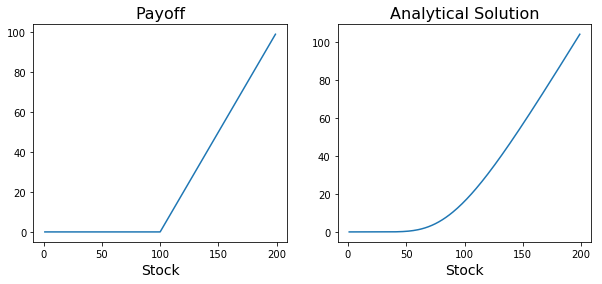

In [2]:
import numpy as np
from scipy.stats import norm
import time 

#Black and Scholes
def BlackScholesFormula(type, S0, K, r, sigma, T):
    dtmp1 = np.log(S0 / K)
    dtmp2 = 1.0/(sigma * np.sqrt(T))
    sigsq = 0.5 * sigma * sigma
    d1 =  dtmp2 * (dtmp1 + T * (r + sigsq))
    d2 =  dtmp2 * (dtmp1 + T * (r - sigsq))
    if type=="C":
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * stats.cdf(-d2) - S0 * norm.cdf(-d1)

K = 100.0
r = 0.05
sigma = 0.35
T = 1
putCall ='C'

Smin = 0.0
Smax = 200.0
ns = 201
Ss = np.linspace(Smin, Smax, ns, endpoint=True)
Ss = Ss[1:-1]
#print Ss

t=time.time()
px = BlackScholesFormula(putCall, Ss, K, r, sigma, T)
elapsed=time.time()-t
print(px)
print("Elapsed Time:", elapsed)
#idx = 200-1
#print Ss[idx]
#print px[idx]

payoff = clip(Ss-K, 0.0, 1e600)
#print "payoff = ", payoff

figure(figsize=[10, 4])
subplot(1, 2, 1)
plot(Ss, payoff)
xlabel('Stock', fontsize=14);
title('Payoff' , fontsize=16);

subplot(1, 2, 2)
plot(Ss, px)
xlabel('Stock', fontsize=14);
title('Analytical Solution' , fontsize=16);

In [3]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_explicit:
  def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
    self.r  = r 
    self.sigma = sigma 
    self.maturity  = maturity

    self.Smin = Smin     
    self.Smax = Smax
    self.Fl = Fl        
    self.Fu = Fu

    self.nt  = nt
    self.ns  = ns
    
    self.dt = float(maturity)/nt
    self.dx = float(Smax-Smin)/(ns+1)
    self.xs = Smin/self.dx

    self.u = empty((nt + 1, ns))
    self.u[0,:] = payoff

    ## Building Coefficient matrix:        
    A = sparse.lil_matrix((self.ns, self.ns))

    for j in range(0, self.ns):
      xd = j + 1 + self.xs
      sx = self.sigma * xd
      sxsq = sx * sx
      
      dtmp1 = self.dt * sxsq
      dtmp2 = self.dt * self.r
      A[j,j] = 1.0 - dtmp1 - dtmp2
      dtmp1 = 0.5 * dtmp1
      dtmp2 = 0.5 * dtmp2 * xd
      if j > 0:
        A[j,j-1] = dtmp1 - dtmp2
      if j < self.ns - 1:
        A[j,j+1] = dtmp1 + dtmp2

    self.A = A.tocsr()

    ### Building bc_coef:
    nxl = 1 + self.xs
    sxl = self.sigma * nxl
    nxu = self.ns + self.xs
    sxu = self.sigma * nxu
    
    self.blcoef = 0.5 * self.dt * (sxl * sxl - self.r * nxl)
    self.bucoef = 0.5 * self.dt * (sxu * sxu + self.r * nxu)
    
  def solve(self):
    for i in range(0, m):
        self.u[i+1,:]          = self.A * self.u[i,:]
        self.u[i+1,0]         += self.blcoef * self.Fl[i]
        self.u[i+1,self.ns-1] += self.bucoef * self.Fu[i]

    return self.u

dx = (Smax - Smin)/(ns-1)
print("ns =", ns)
print("dx =", dx)
print("sigma =", sigma)
dt_max = dx*dx/(sigma*sigma*Smax*Smax)
print("by CFL, dt <", dt_max)
mt_min = int(T/dt_max)+1
print("mt_min ~= ", mt_min)



ns = 201
dx = 1.0
sigma = 0.35
by CFL, dt < 0.00020408163265306126
mt_min ~=  4900


Elapsed Time1: 0.04476022720336914
[  4.07772413e-23   1.58474399e-20   1.73965059e-18   8.74535265e-17
   2.49568562e-15   4.58093482e-14   5.87935695e-13   5.60665034e-12
   4.16258352e-11   2.49732862e-10   1.24803027e-09   5.32745593e-09
   1.98368066e-08   6.55753768e-08   1.95342914e-07   5.31044478e-07
   1.33172299e-06   3.10914675e-06   6.81146334e-06   1.40982161e-05
   2.77310391e-05   5.21031331e-05   9.39269921e-05   1.63093911e-04
   2.73710967e-04   4.45312032e-04   7.04229658e-04   1.08510517e-03
   1.63250565e-03   2.40260928e-03   3.46491532e-03   4.90393153e-03
   6.82079120e-03   9.33475279e-03   1.25845383e-02   1.67294712e-02
   2.19503804e-02   2.84502447e-02   3.64545569e-02   4.62113982e-02
   5.79912176e-02   7.20863197e-02   8.88100703e-02   1.08495836e-01
   1.31495676e-01   1.58178815e-01   1.88929915e-01   2.24147190e-01
   2.64240376e-01   3.09628608e-01   3.60738215e-01   4.18000478e-01
   4.81849371e-01   5.52719318e-01   6.31042986e-01   7.17249139e-01

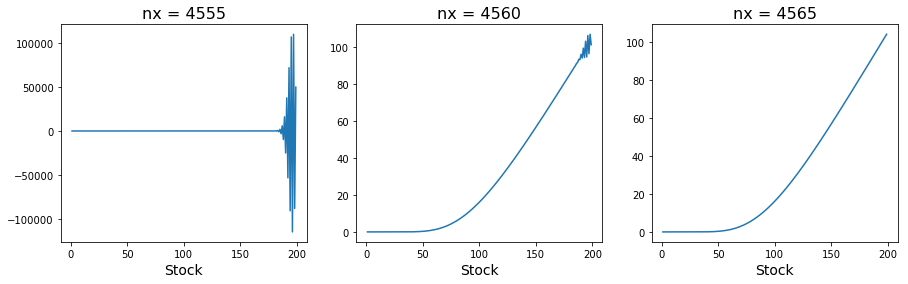

In [4]:
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
#print "payoff = ", payoff
  
m = 4555 
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

##print  px_fd_mat.shape
nrow = len(px_fd_mat[:,1])
print(px_fd_mat[nrow-1,:])

figure(figsize=[15, 4]);
subplot(1, 3, 1)
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 4560
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 4565
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f' % m, fontsize=16);

Elapsed Time1: 0.04440593719482422
[  1.01704397e-28   5.07283379e-26   7.18984489e-24   4.68830891e-22
   1.74072660e-20   4.16234095e-19   6.95467412e-18   8.61238308e-17
   8.26824165e-16   6.37765319e-15   4.06932208e-14   2.20044937e-13
   1.02914359e-12   4.23570647e-12   1.55695816e-11   5.17651596e-11
   1.57382418e-10   4.41714179e-10   1.15387760e-09   2.82564962e-09
   6.52727942e-09   1.43015144e-08   2.98649516e-08   5.96924592e-08
   1.14628045e-07   2.12191890e-07   3.79775698e-07   6.58934313e-07
   1.11098825e-06   1.82414722e-06   2.92234764e-06   4.57596663e-06
   7.01453177e-06   1.05414905e-05   1.55510379e-05   2.25469294e-05
   3.21631260e-05   4.51860447e-05   6.25781067e-05   8.55022075e-05
   1.15346670e-04   1.53750189e-04   2.02626238e-04   2.64186378e-04
   3.40961911e-04   4.35823312e-04   5.51996896e-04   6.93078223e-04
   8.63041768e-04   1.06624646e-03   1.30743677e-03   1.59173903e-03
   1.92465290e-03   2.31203775e-03   2.76009409e-03   3.27534000e-03

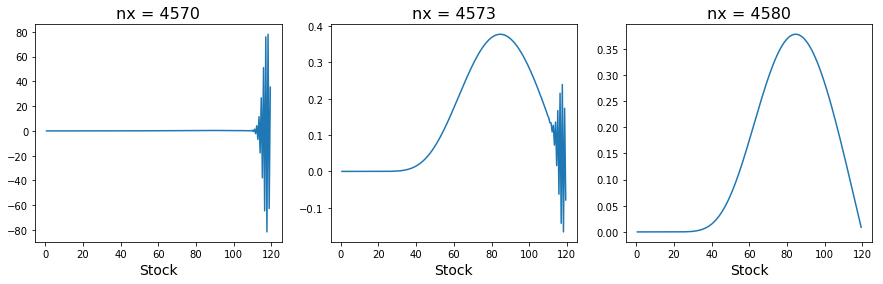

In [5]:
Smax = 120
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
#print "payoff = ", payoff
  
m = 4570
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs1 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

##print  px_fd_mat.shape
nrow = len(px_fd_mat[:,1])
print(px_fd_mat[nrow-1,:])

figure(figsize=[15, 4]);
subplot(1, 3, 1)
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 4573
Fl = zeros((m+1,))
Fu = zeros((m+1,))

t = time.time()
bs2 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 4580
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs3 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f' % m, fontsize=16);

In [6]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_implicit:
  def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
    self.r  = r 
    self.sigma = sigma 
    self.maturity  = maturity

    self.Smin = Smin     
    self.Smax = Smax
    self.Fl = Fl        
    self.Fu = Fu

    self.nt  = nt
    self.ns  = ns
    
    self.dt = float(maturity)/nt
    self.dx = float(Smax-Smin)/(ns+1)
    self.xs = Smin/self.dx

    self.u = empty((nt + 1, ns))
    self.u[0,:] = payoff

    ## Building Coefficient matrix:        
    A = sparse.lil_matrix((self.ns, self.ns))

    for j in range(0, self.ns):
      xd = j + 1 + self.xs
      sx = self.sigma * xd
      sxsq = sx * sx
      
      dtmp1 = self.dt * sxsq
      dtmp2 = self.dt * self.r
      A[j,j] = 1.0 + dtmp1 + dtmp2
        
      dtmp1 = -0.5 * dtmp1
      dtmp2 = -0.5 * dtmp2 * xd
      if j > 0:
        A[j,j-1] = dtmp1 - dtmp2
      if j < self.ns - 1:
        A[j,j+1] = dtmp1 + dtmp2

    self.A = linsolve.splu(A)
    self.rhs = empty((self.ns, ))
    
    ### Building bc_coef:
    nxl = 1 + self.xs
    sxl = self.sigma * nxl
    nxu = self.ns + self.xs
    sxu = self.sigma * nxu
    
    self.blcoef = 0.5 * self.dt * (- sxl * sxl + self.r * nxl)
    self.bucoef = 0.5 * self.dt * (- sxu * sxu - self.r * nxu)    
    
  def solve(self):
    for i in range(0, m):
        self.rhs[:] = self.u[i,:]
        self.rhs[0]         -= self.blcoef * self.Fl[i]
        self.rhs[self.ns-1] -= self.bucoef * self.Fu[i]
        self.u[i+1,:] = self.A.solve(self.rhs)

    return self.u



/opt/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:253: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Elapsed Time1: 0.07251667976379395
Elapsed Time2: 0.017630577087402344
Elapsed Time3: 0.004076242446899414
[  2.98641926e-21   7.95294389e-19   6.07132757e-17   2.16141936e-15
   4.46125332e-14   6.06271497e-13   5.90512355e-12   4.38258315e-11
   2.59592502e-10   1.27238057e-09   5.31142971e-09   1.93277995e-08
   6.24868999e-08   1.82323286e-07   4.86411656e-07   1.19954343e-06
   2.75978915e-06   5.97002567e-06   1.22239975e-05   2.38272713e-05
   4.44331425e-05   7.96114517e-05   1.37564347e-04   2.29997480e-04
   3.73148280e-04   5.88965351e-04   9.06425082e-04   1.36296400e-03
   2.00599845e-03   2.89449764e-03   4.10057163e-03   5.71103357e-03
   7.82889451e-03   1.05747499e-02   1.40880193e-02   1.85280050e-02
   2.40747384e-02   3.09295924e-02   3.93156382e-02   4.94777381e-02
   6.16823668e-02   7.62171638e-02   9.33902216e-02   1.13529124e-01
   1.36979747e-01   1.64104854e-01   1.95282487e-01   2.30904205e-01
   2.71373176e-01   3.17102172e-01   3.68511464e-01   4.26026688e

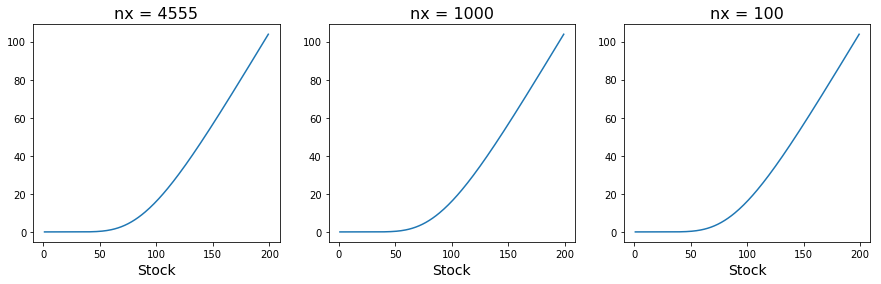

In [7]:
Smax = 200
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
  
m = 4555 
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

#print  px_fd_mat.shape

figure(figsize=[15, 4]);
subplot(1, 3, 1)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m,  fontsize=16);

m = 1000
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 100
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);


print(px_fd_mat[nrow-1,:])


/opt/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:253: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Elapsed Time1: 0.07329130172729492
Elapsed Time2: 0.018253803253173828
Elapsed Time3: 0.004925966262817383
[  7.86391997e-26   2.43630771e-23   2.17528767e-21   9.09456815e-20
   2.21047505e-18   3.54181257e-17   4.06680009e-16   3.55313181e-15
   2.47154878e-14   1.41799741e-13   6.90208717e-13   2.91621919e-12
   1.08981438e-11   3.65882728e-11   1.11800634e-10   3.14357643e-10
   8.20959540e-10   2.00717719e-09   4.62568425e-09   1.01075920e-08
   2.10483475e-08   4.19585339e-08   8.03800929e-08   1.48488656e-07
   2.65321208e-07   4.59783507e-07   7.74601788e-07   1.27138672e-06
   2.03697314e-06   3.19118575e-06   4.89615859e-06   7.36730436e-06
   1.08859900e-05   1.58139276e-05   2.26092360e-05   3.18440739e-05
   4.42236828e-05   6.06066236e-05   8.20259326e-05   1.09710872e-04
   1.45108906e-04   1.89907492e-04   2.46055265e-04   3.15782142e-04
   4.01617915e-04   5.06408855e-04   6.33331909e-04   7.85906063e-04
   9.68000495e-04   1.18383919e-03   1.43800172e-03   1.73541999e

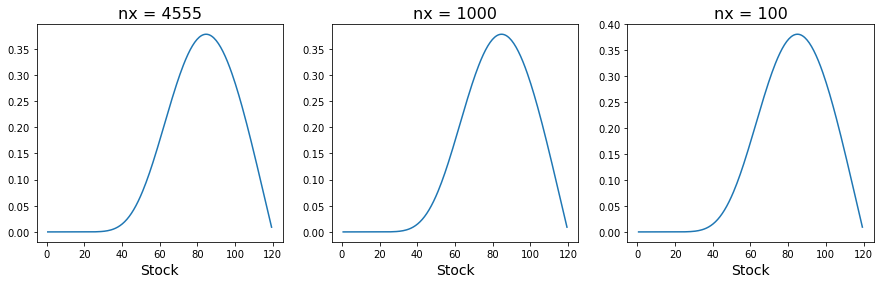

In [8]:
Smax = 120

n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
  
m = 4555 
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs1 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

#print  px_fd_mat.shape

figure(figsize=[15, 4]);
subplot(1, 3, 1)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m,  fontsize=16);

m = 1000
Fl = zeros((m+1,))
Fu = zeros((m+1,))

t = time.time()
bs2 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);

m = 100
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs3 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nx = %.f'%m, fontsize=16);


print(px_fd_mat[nrow-1,:])


# Homework 

* Implement the FDM for Black-Scholes PDE using the Crank-Nicolson Scheme and test your code using the same example here for both the vanilla European Call and the Up-and-out Barrier Call.



